In [5]:
import os

# Set the working directory
os.chdir('/Users/chennanli/Desktop/Projects/forecasting/TimeSeriesForecasting_Sep2024')

# Set the project root directory
PROJECT_ROOT = os.getcwd()

# Define paths for raw and processed data
RAW_DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'raw')
PROCESSED_DATA_PATH = os.path.join(PROJECT_ROOT, 'data', 'processed')

# Create the processed data directory if it doesn't exist
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

# ... rest of your imports and code ...

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [8]:
pjme = pd.read_csv(
    os.path.join(
        RAW_DATA_PATH, 'PJME_hourly.csv'), index_col=[0], parse_dates=[0])

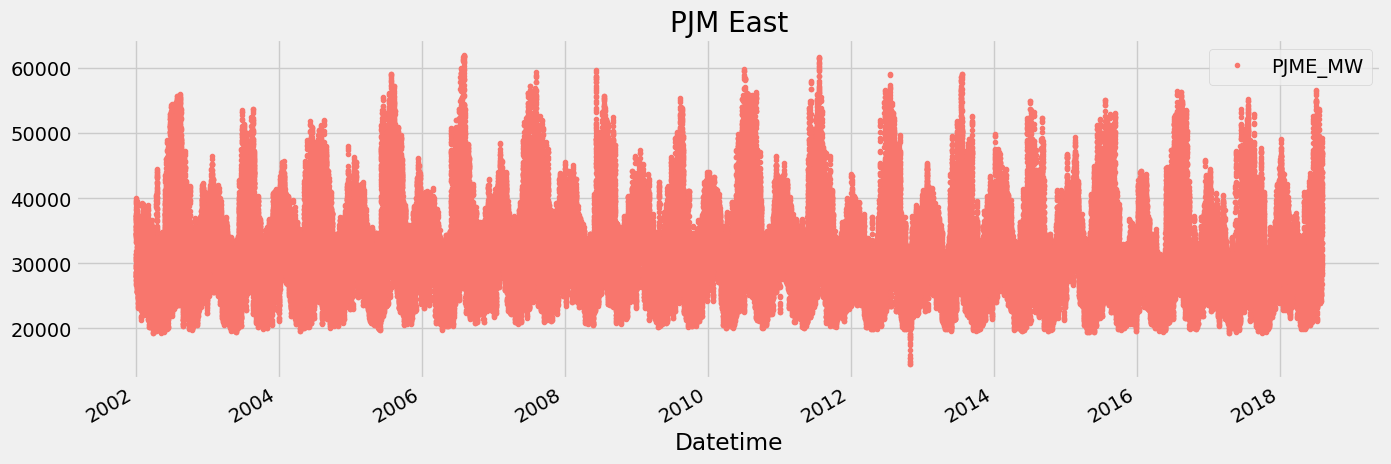

In [9]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = pjme.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')


